In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns; sns.set()
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [166]:
df = pd.read_csv('Request for Niko2.csv')
print(df.columns)

Index(['Case', 'credit_score', 'Age', 'state', 'state_id', 'zip',
       'gross_income', 'veh_body_style', 'body_id', 'veh_year', 'veh_mileage',
       'retail_value'],
      dtype='object')


In [167]:
cols_of_interest1 = ['Age', 'state_id','credit_score','gross_income', 'body_id','veh_year','veh_mileage',
                    'retail_value']

cols_of_interest2 = ['Age', 'state_id','gross_income', 'body_id','veh_year','veh_mileage',
                    'retail_value']

In [168]:
data1 = df[cols_of_interest1]
data2 = df[cols_of_interest2]

In [225]:
print(data1)

      Age  state_id  credit_score  gross_income  body_id  veh_year  \
0      39        46           644          4917        2      2014   
1      41        46           647          5724        2      2016   
2      30        46           650          5512        2      2017   
3      52        49           584          3227        2      2018   
4      42        49           638          4304        2      2016   
5      26        49           697          2916        2      2017   
6      23        15           730          3541        2      2017   
7      45        49           580          9575        2      2016   
8      42        35           594          4179        2      2012   
9      30         4           724          3500        2      2014   
10     34        12           602          3555        2      2018   
11     26         4           715          1831        2      2017   
12     27        12           736          3004        2      2015   
13     58        35 

In [169]:
print(cols_of_interest1)

['Age', 'state_id', 'credit_score', 'gross_income', 'body_id', 'veh_year', 'veh_mileage', 'retail_value']


In [264]:
X1 = RobustScaler().fit_transform(data1)
X2 = RobustScaler().fit_transform(data2)
X1

array([[ 0.17647059,  0.54545455, -0.30534351, ..., -1.        ,
        -0.63049564, -0.08982922],
       [ 0.29411765,  0.54545455, -0.27480916, ...,  0.        ,
         0.29854172, -0.68164525],
       [-0.35294118,  0.54545455, -0.24427481, ...,  0.5       ,
         0.42698736, -0.37728272],
       ...,
       [-0.23529412,  0.60606061, -0.59033079, ..., -2.5       ,
        -0.04782279, -0.50198681],
       [ 0.23529412,  0.48484848,  0.10178117, ...,  0.5       ,
        -0.17397293,  0.97966689],
       [ 0.05882353, -0.66666667,  1.03816794, ..., -0.5       ,
         0.70494615, -0.07714745]])

In [292]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X1)
print("model\n", model)

#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X1)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [293]:
centers = model.cluster_centers_
centers

array([[ 2.48576850e-01, -7.23362659e-02, -1.64929273e-01,
         5.31777274e-03,  1.19569892e+00,  4.35483871e-01,
        -1.90794206e-01,  2.32360519e-01],
       [ 1.30340557e+00, -8.54408749e-02, -8.56339322e-02,
        -3.06509278e-01, -2.58646617e-01, -1.72932331e-01,
         1.42013784e-02, -7.71309191e-02],
       [-7.39495798e-03, -1.73679654e-01, -1.61105053e-02,
        -5.72682588e-02, -5.21142857e-01,  1.00857143e+00,
        -7.20333393e-01,  2.77187304e-01],
       [ 5.74229692e-01, -3.46320346e-02,  2.91288016e-01,
         6.16763517e+00,  1.14285714e-01,  9.52380952e-02,
        -1.44568743e-01,  1.21235124e+00],
       [ 3.15508021e-01,  8.89055848e-02,  5.78133872e-01,
         3.27299673e-01,  4.16528926e-01,  8.80165289e-01,
        -6.64446811e-01,  1.57270359e+00],
       [ 1.45299145e-01, -6.52680653e-02, -1.71549118e-01,
         1.79824130e-01,  4.64957265e-01, -2.11965812e+00,
         1.41601536e+00, -2.41829832e-01],
       [ 4.58144796e-01, -5.885780

In [294]:
import sklearn.metrics
labels = k_means.labels_
metrics.silhouette_score(X1, labels, metric = 'euclidean')

0.11603532771900966

In [295]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X1)
    sum_of_squared_distances.append(k_means.inertia_)
    
    
    

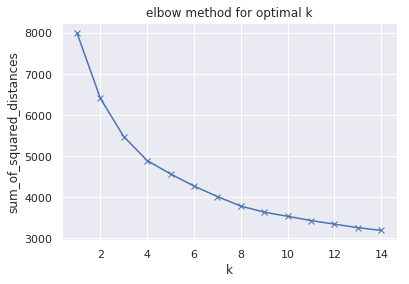

In [297]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [299]:
k_means_5 = KMeans(n_clusters=5)
model = k_means_5.fit(X1)
y_hat_5 = k_means_5.predict(X1)
labels_5 = k_means_5.labels_
metrics.silhouette_score(X1, labels_5, metric = 'euclidean')

0.1637946361330399

In [300]:
kmeans = KMeans(n_clusters=5)
model = kmeans.fit(X1)
print("model\n", model)

#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X1)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [301]:
#function that creates a dataframe with a column for cluster number
def pd_centers(X1, centers):
        colNames = list(X1)
        colNames.append('prediction')
# Zip with a column called 'prediction' (index)
        Z = [np.append(A, index) for index, A in enumerate(centers)]
# Convert to pandas data frame for plotting
        P = pd.DataFrame(Z, columns=colNames)
        P['prediction'] = P['prediction'].astype(int)
        return P
P

,Age,state_id,credit_score,gross_income,body_id,veh_year,veh_mileage,retail_value,prediction
0,-0.498223,-1.063873,0.003356,-0.260011,-0.518793,0.372210,-0.347109,-0.286811,0
1,0.477412,-0.136825,0.647709,3.159999,0.293725,0.343647,-0.336695,0.906110,1
2,0.033150,0.312297,0.368420,0.241561,0.917389,0.663118,-0.556169,1.204489,2
3,-0.145462,-0.060305,-0.321766,-0.115679,0.359787,-1.396187,1.451657,-0.503108,3
4,-0.582660,0.902088,0.080981,-0.357762,-0.605587,0.054893,-0.120624,-0.465687,4
5,1.532772,-0.105253,-0.449278,-0.245807,-0.154708,-0.012322,-0.142370,-0.266823,5


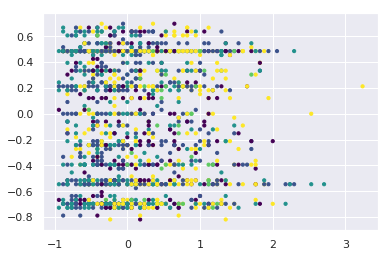

In [303]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X1, n_clusters, rseed=4):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X1.shape[0])[:n_clusters]
    centers = X1[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X1, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X1[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X1, 5)
plt.scatter(X1[:, 0], X1[:, 1], c=labels,
            s=10, cmap='viridis');

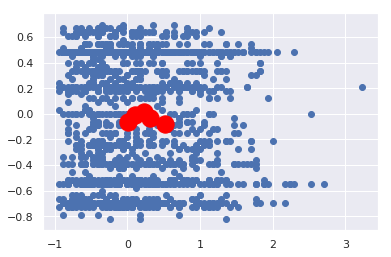

In [306]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X1)
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()